In [19]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)

In [20]:
clf.predict([[2., 2.]])

array([1])

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

10
DecisionTreeClassifier(max_features='sqrt', random_state=2092388001)


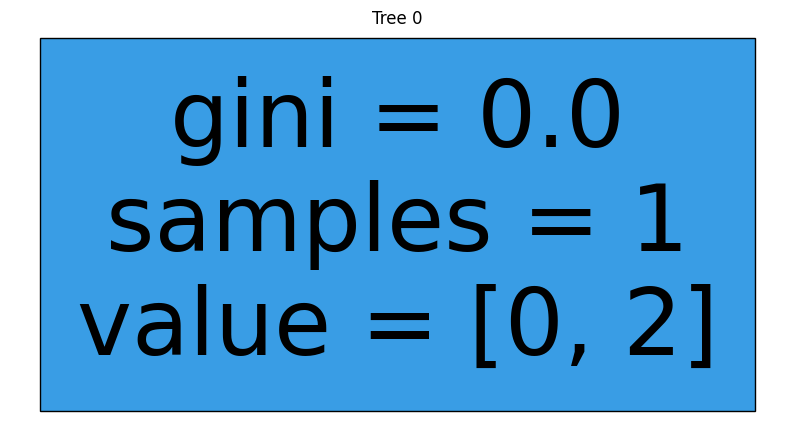

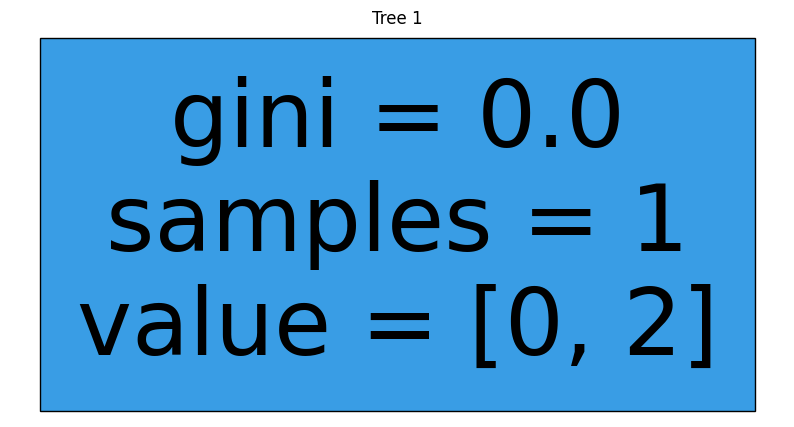

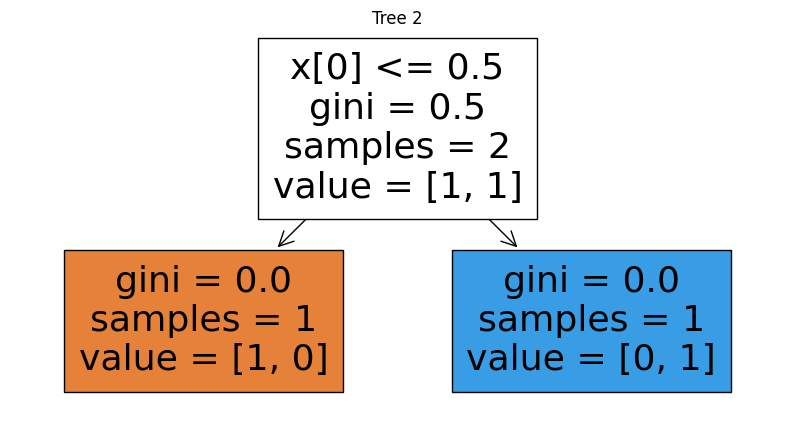

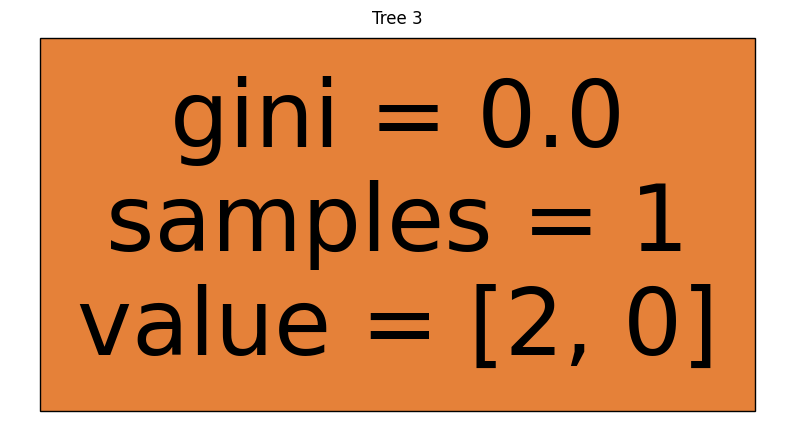

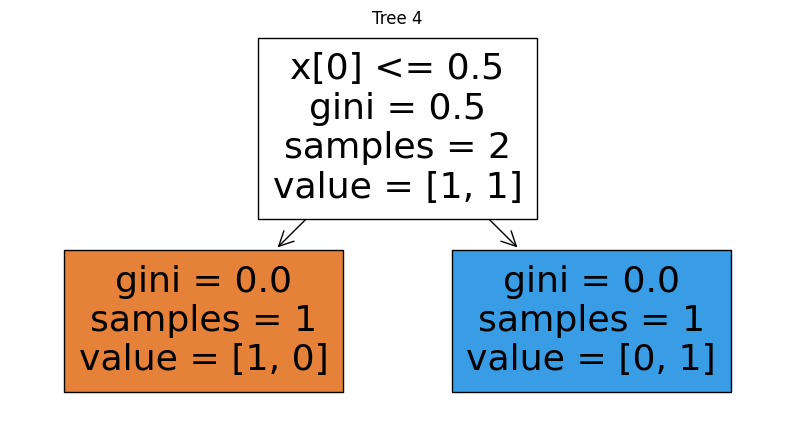

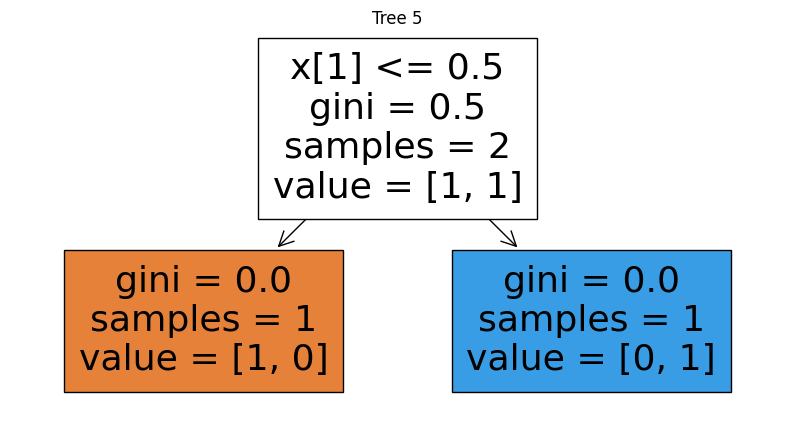

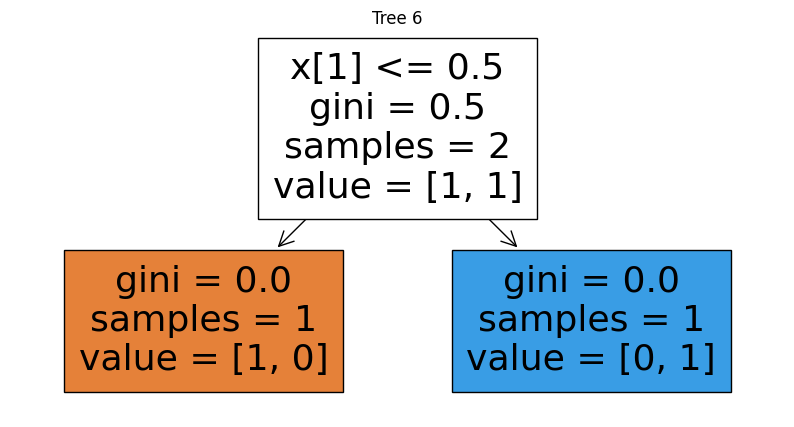

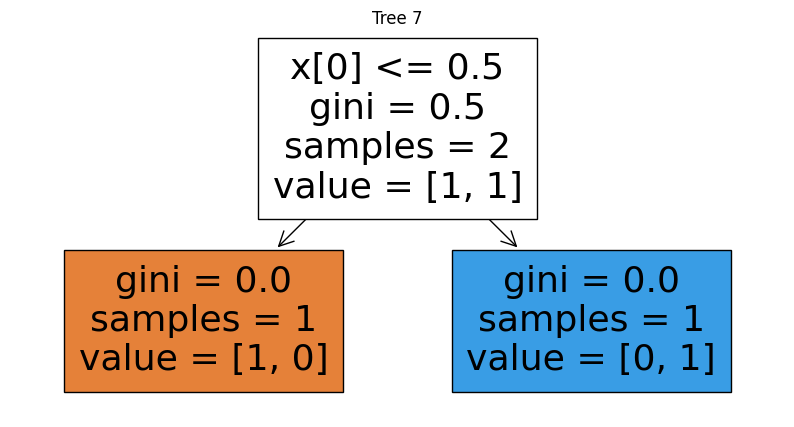

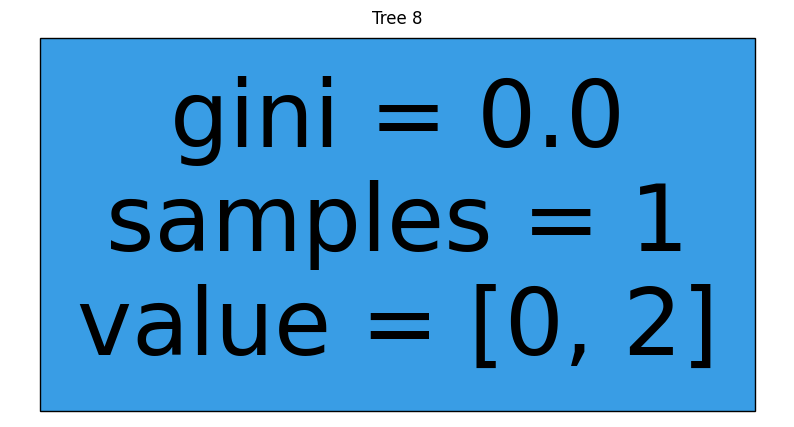

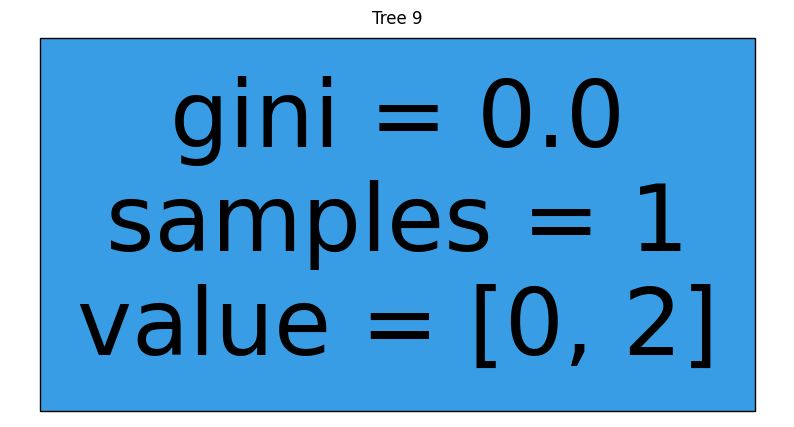

In [22]:
estimators = clf.estimators_
print(len(estimators))  # Number of trees
print(estimators[0])  # First tree

from sklearn.tree import plot_tree

# Plot the first few trees
for tree_idx, tree in enumerate(estimators):  # Only looking at the first class
    fig, ax = plt.subplots(figsize=(10, 5))
    plot_tree(tree, ax=ax, filled=True)
    plt.title(f'Tree {tree_idx}')
    plt.show()

In [23]:
from sklearn.tree import _tree
import numpy as np

In [24]:
def recurse(tree_, feature_names, node, depth):
    indent = "    " * (depth+2)
    if tree_.feature[node] != _tree.TREE_UNDEFINED:
        name = feature_names[tree_.feature[node]]
        threshold = tree_.threshold[node]

        if depth == 1:
            print("{}return Provable.if({}.lessThan(Field({})), ".format(indent, name, int(np.round(threshold * 100,0))))
        else:
            print("{}Provable.if({}.lessThan(Field({})), ".format(indent, name, int(np.round(threshold * 100,0))))
        recurse(tree_, feature_names, tree_.children_left[node], depth + 1)
        print("{}, ".format(indent))
        recurse(tree_, feature_names, tree_.children_right[node], depth + 1)
        if depth == 1:
            print("{});".format(indent))
        else:
            print("{})".format(indent))
    else:
        print("{}Field({})".format(indent, np.argmax(tree_.value[node][0])))

In [25]:
def rf_to_o1js(estimators, tree, feature_names):
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]

    print("const DecisionTree = ZkProgram({")
    print("    name: 'DecisionTree',")
    print("    publicOutput: Field,")
    print("methods: {")
    print("    predict: {")
    print("        privateInputs: [{}],".format(", ".join(["Field"] * len(feature_names))))
    print("        method({}): Field {{".format(", ".join(feature_names)))

    for tree_idx, tree in enumerate(estimators):  # Only looking at the first class
        tree_ = tree.tree_
        print("        if (Field({}).eq(1)) {{".format(tree_idx))
        recurse(tree_, feature_name, 0, 1)
        print("        } else")
    print("        },")
    print("    },")
    print("},")
    print("});")

In [26]:
rf_to_o1js(estimators, tree, ["feature1", "feature2"])

UnboundLocalError: cannot access local variable 'tree_' where it is not associated with a value